In [9]:
### Libraries 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely.geometry import Polygon
from math import radians, cos, sin, asin, sqrt, degrees
import geopy
import geopy.distance
import seaborn as sns

### In this notebook we share the raw data and the codes to generate the Supplementary Figures

# Table of contents
- [Figure S1](#Figure-S1)
- [Figure S2](#Figure-S2)
- [Figure S3](#Figure-S3)
- [Figure S4](#Figure-S4)
- [Figure S5](#Figure-S5)
- [Figure S6](#Figure-S6)
- [Figure S8](#Figure-S8)
- [Figure S9](#Figure-S9)
- [Figure S10](#Figure-S10)

# Figure S1

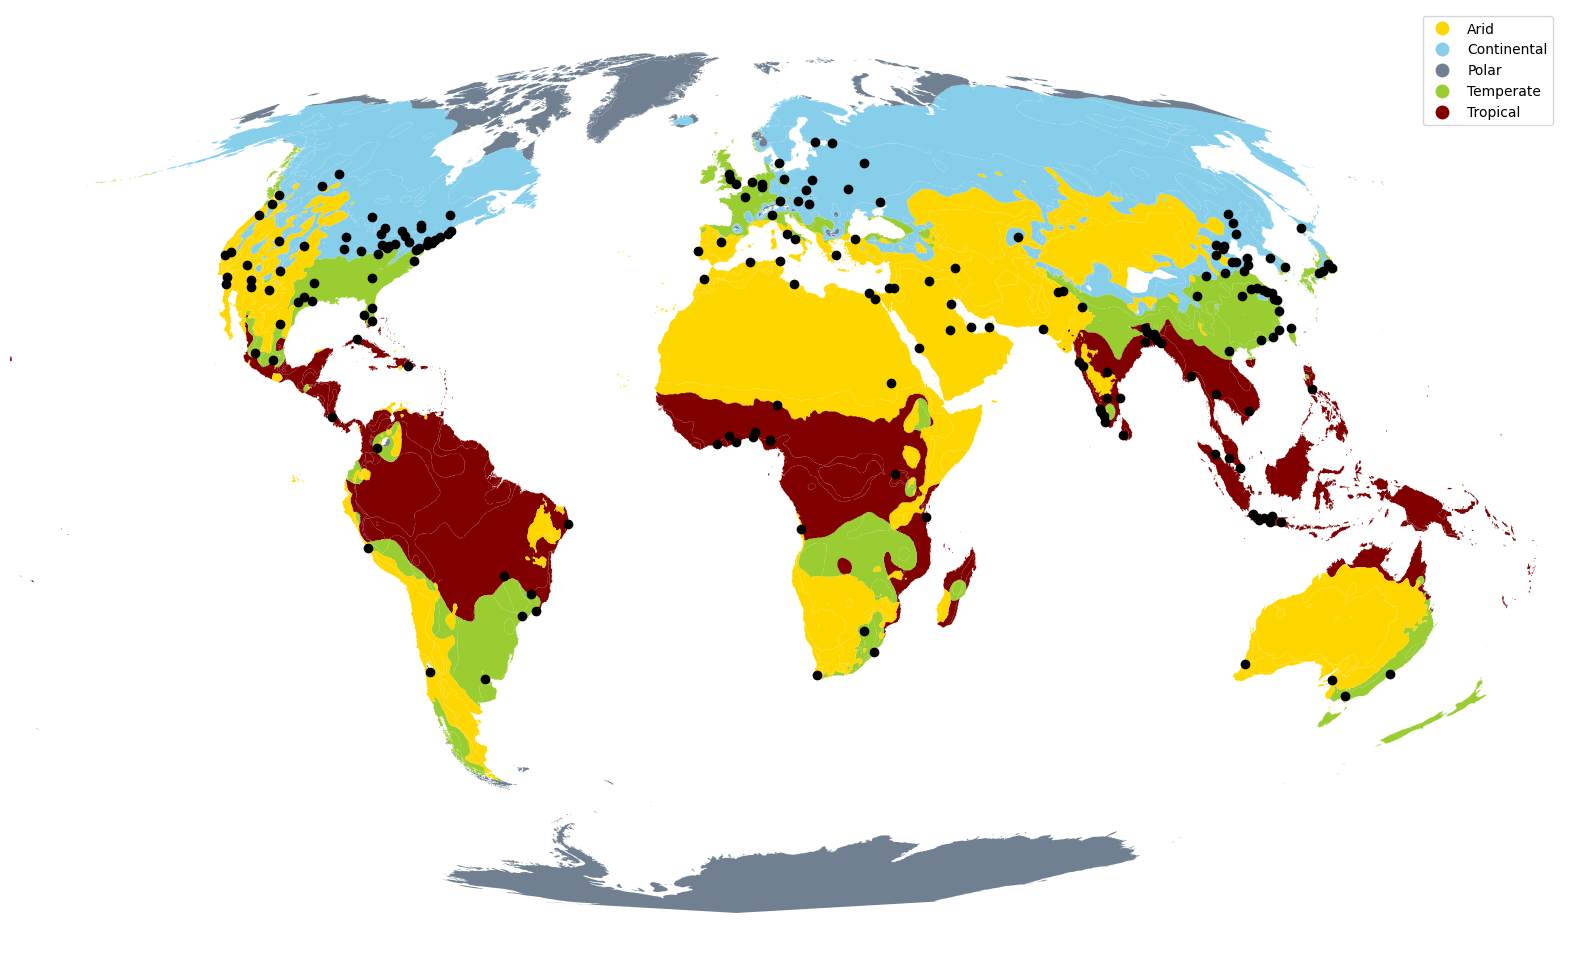

In [10]:
############# Raw data ########################################
gdf_c = gpd.read_file('../data_revision/climate/kg.shp')
dfc = gpd.read_file('../data_revision/cities/all/gdfCities.shp')
dfc['x']=dfc['geometry'].centroid.x
dfc['y']=dfc['geometry'].centroid.y

############# Plot ###############################################
cmap = mpl.colors.ListedColormap(['gold','skyblue','slategrey','yellowgreen','maroon'])
f,ax=plt.subplots(figsize=(20,20))
gdf_c.plot(column='climate',ax=ax,cmap=cmap, legend=True)
ax.scatter(dfc.x, dfc.y, color='black')
ax.set_xlim([-1.5e7, 1.7e7])
ax.axis('off');

# Figure S2

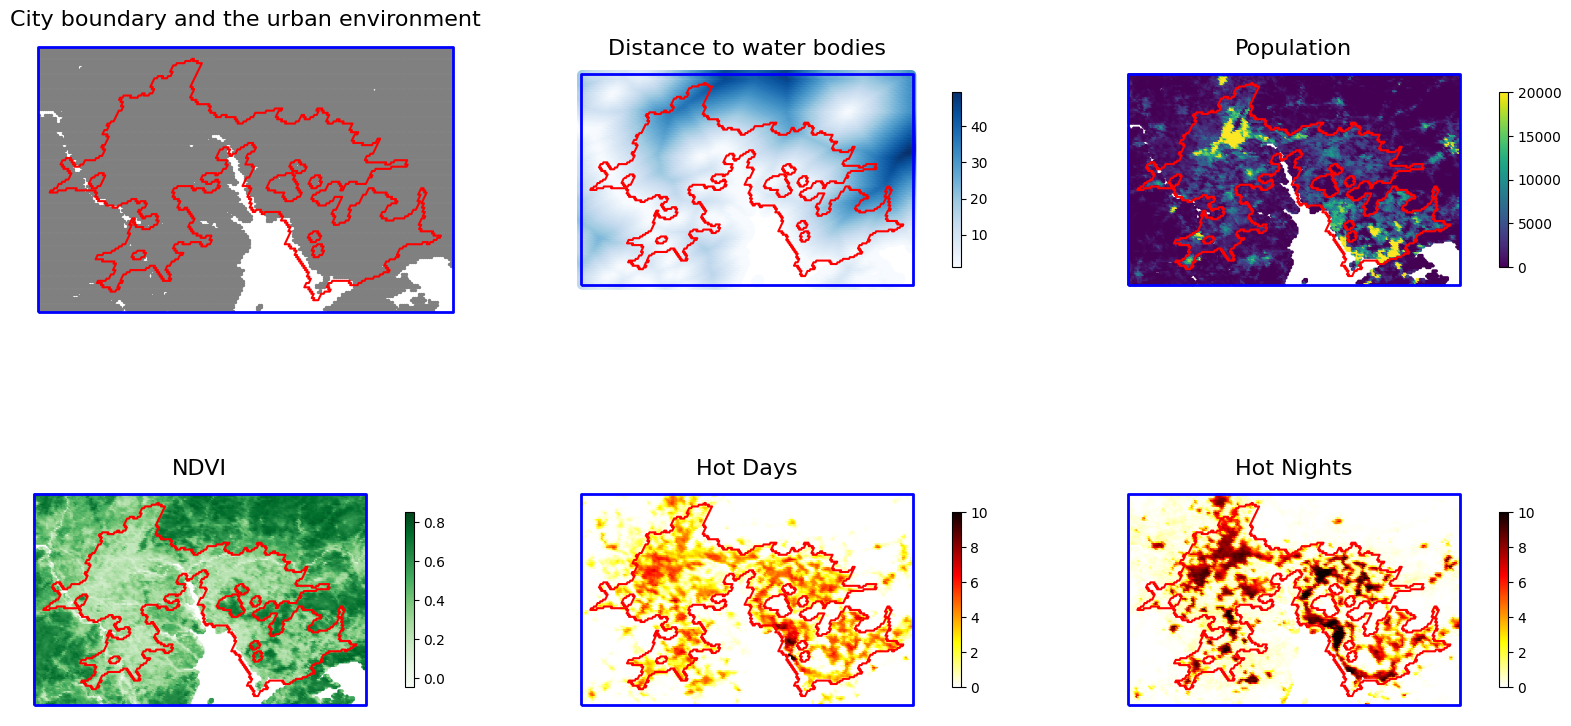

In [23]:
def returnSquare(gdf):
    bounds = gdf.total_bounds
    lon_point_list = [bounds[0], bounds[0], bounds[2], bounds[2]]
    lat_point_list = [bounds[1], bounds[3], bounds[3], bounds[1]]
    polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
    crs = {'init': 'epsg:4326'}
    square = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])
    square = square.to_crs(crs)
    ## create a buffer of the square of 5 km
    ##
    # = 5 ## kilometers
    distance = sqrt(5*5 + 5*5)  #Pitagora

    ## corner low left
    start = geopy.Point(bounds[1], bounds[0])
    d = geopy.distance.geodesic(kilometers = distance)
    lond1 = d.destination(point=start, bearing=225)[1]
    latd1 = d.destination(point=start, bearing=225)[0]

    ## corner up right
    start = geopy.Point(bounds[3], bounds[2])
    d = geopy.distance.geodesic(kilometers = distance)
    lond2 = d.destination(point=start, bearing=45)[1]
    latd2 = d.destination(point=start, bearing=45)[0]

    ## create buffered square
    lon_point_list = [lond1, lond1, lond2, lond2]
    lat_point_list = [latd1, latd2, latd2, latd1]
    polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
    square1 = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])

    return square, square1
def returnCityBoundary(urban_gdf_cities):
    S = []
    for i in urban_gdf_cities.index:
        original_df = urban_gdf_cities[urban_gdf_cities.index==i]
        exploded = original_df.explode()
        s,s1 = returnSquare(exploded)
        S.append(s1)
    return S

############# Raw data ########################################
fs = 16
fs1 = 14
dfc = dfc.to_crs('EPSG:4326')
geo = dfc[dfc.index==0]
gdf_city = gpd.read_file('../data_revision/GEE_dataframes/gdf_%d.shp'%0)
gdf_city['hot_days']=gdf_city['hot_days']/11
gdf_city['hot_nights']=gdf_city['hot_nights']/11
gdf_city['dist']=-gdf_city['dist']
gdf_city = gdf_city[gdf_city['NDVI']>=-1]
gdf_city = gdf_city[gdf_city['dist']>0].dropna().reset_index(drop=True)
S = returnCityBoundary(geo)

############# Plot ###############################################
f,axs = plt.subplots(2, 3, figsize=(20,10))
ax = axs[0][0]
gdf_city.plot(ax=ax, color='gray', markersize=2)
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('City boundary and the urban environment', size=fs)
ax.axis('off');


ax = axs[0][1]
gdf_city.plot(ax=ax, column = 'dist', cmap='Blues', legend=True, legend_kwds={'shrink': 0.5})
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('Distance to water bodies', size=fs)
ax.axis('off');

ax = axs[0][2]
gdf_city.plot(ax=ax, column = 'pop', cmap='viridis', markersize=2,
              legend=True, legend_kwds={'shrink': 0.5}, vmax=20000)
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('Population', size=fs)
ax.axis('off');


ax = axs[1][0]
gdf_city.plot(ax=ax, column = 'NDVI', cmap='Greens', markersize=2,
              legend=True, legend_kwds={'shrink': 0.5}, vmax=0.85)
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('NDVI', size=fs)
ax.axis('off');


ax = axs[1][1]
gdf_city.plot(ax=ax, column = 'hot_days', cmap='hot_r', markersize=2,
              legend=True, legend_kwds={'shrink': 0.5}, vmax=10)
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('Hot Days', size=fs)
ax.axis('off');


ax = axs[1][2]
gdf_city.plot(ax=ax, column = 'hot_nights', cmap='hot_r', markersize=2,
              legend=True, legend_kwds={'shrink': 0.5}, vmax=10)
geo.boundary.plot(ax=ax,color='red')
S[0].boundary.plot(ax=ax,color='blue', lw=2)
ax.set_title('Hot Nights', size=fs)
ax.axis('off');



# Figure S3

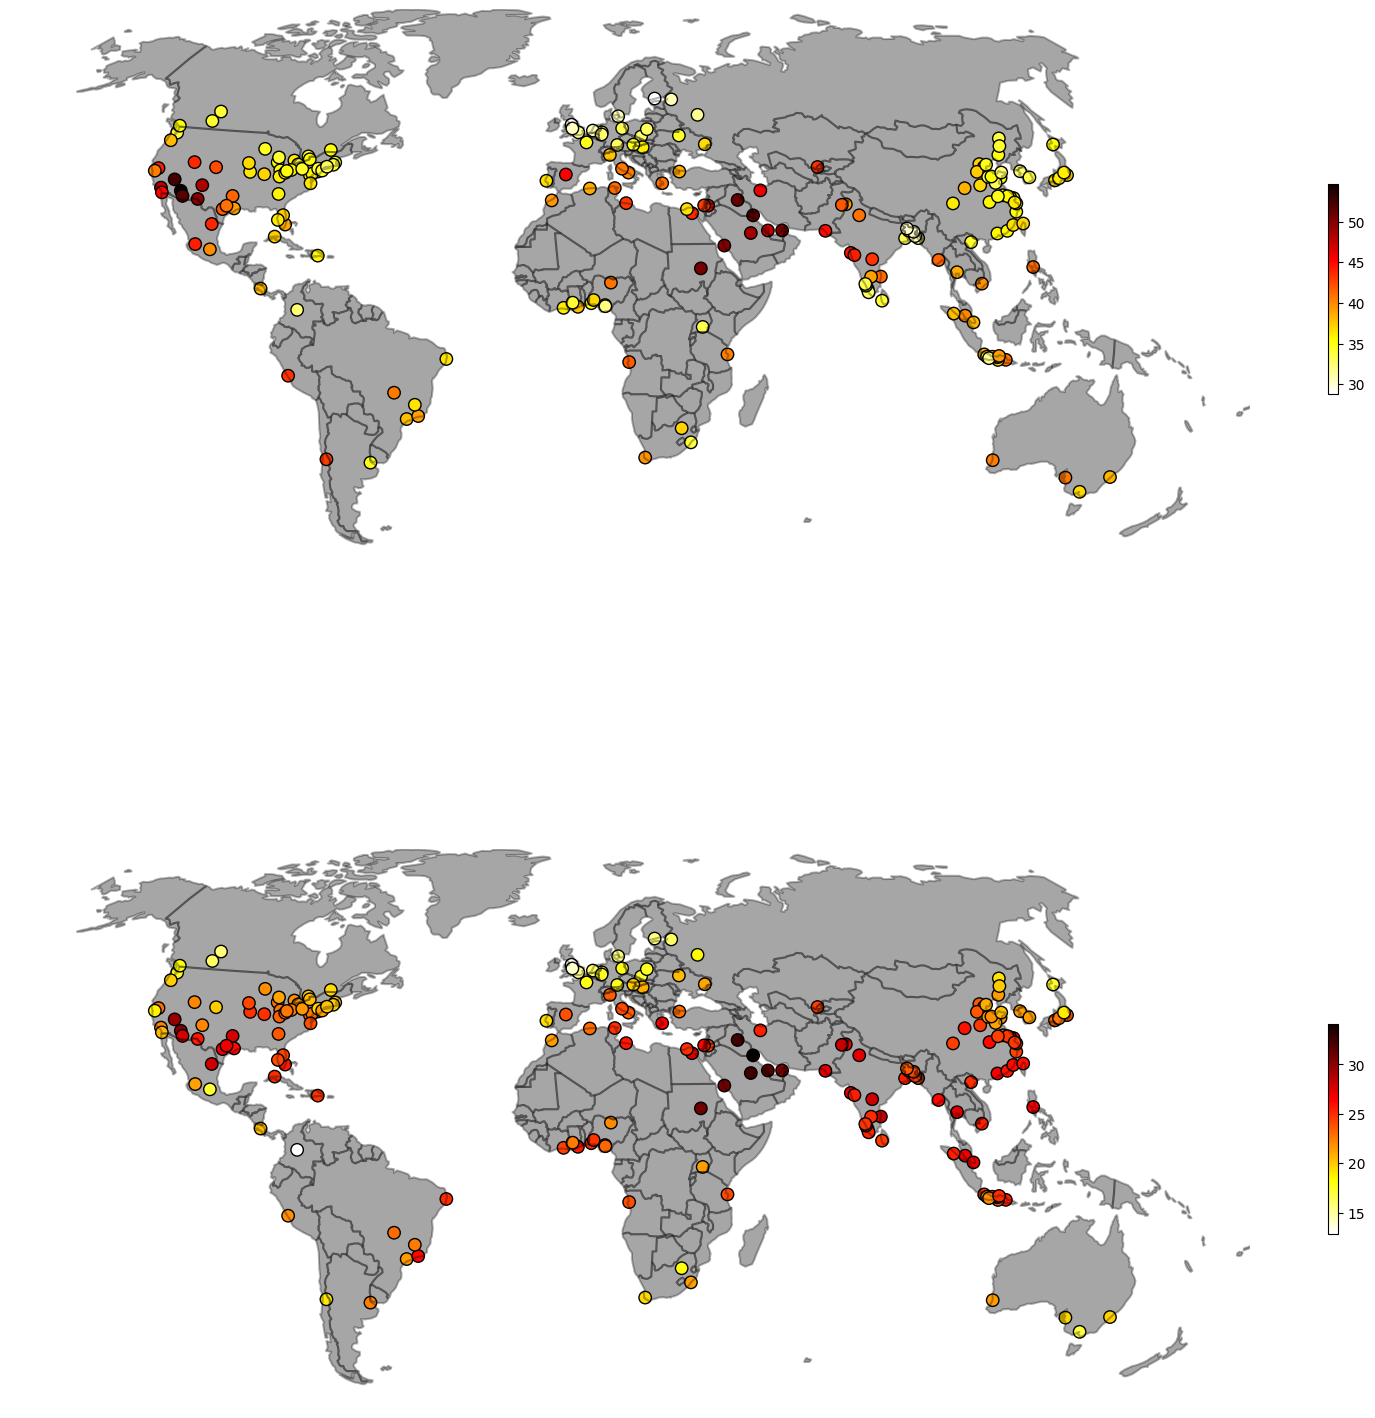

In [27]:
############# Raw Data ###############################################

dfTreshold = pd.read_csv('../data_revision/dfTreshold3.csv')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs('+proj=wintri') 
dfcc = dfc.to_crs('+proj=wintri') 

DFC = pd.DataFrame()
DFC['X']=dfcc['geometry'].centroid.x
DFC['Y']=dfcc['geometry'].centroid.y
DFC['tresholdDay'] = dfTreshold['Tr_day3']
DFC['tresholdNight'] = dfTreshold['Tr_night3']
gdf = gpd.GeoDataFrame(DFC, geometry=gpd.points_from_xy(DFC.X, DFC.Y))


############# Plot ###############################################

f,axs = plt.subplots(2,1, figsize=(20,20))
ax=axs[0]
world.plot(ax=ax, color='gray', alpha=0.7)
world.boundary.plot(ax=ax, color='black', alpha=0.3)
gdf.plot(column='tresholdDay', ax=ax, legend=True, 
         legend_kwds={'shrink': 0.3}, 
         cmap='hot_r',
         edgecolor="black", 
         markersize=40*2)


ax.set_xlim([-16646156, 19646156]);
ax.set_ylim([-7018754, 9328438]);
cb_ax = f.axes[1] 
cb_ax.tick_params(labelsize=fs);
ax.axis('off');

ax=axs[1]
world.plot(ax=ax, color='gray', alpha=0.7)
world.boundary.plot(ax=ax, color='black', alpha=0.3)
gdf.plot(column='tresholdNight', ax=ax, legend=True, 
         legend_kwds={'shrink': 0.3}, 
         cmap='hot_r',
         edgecolor="black", 
         markersize=40*2)


ax.set_xlim([-16646156, 19646156]);
ax.set_ylim([-7018754, 9328438]);
cb_ax = f.axes[1] 
cb_ax.tick_params(labelsize=fs);
ax.axis('off');

# Figure S4

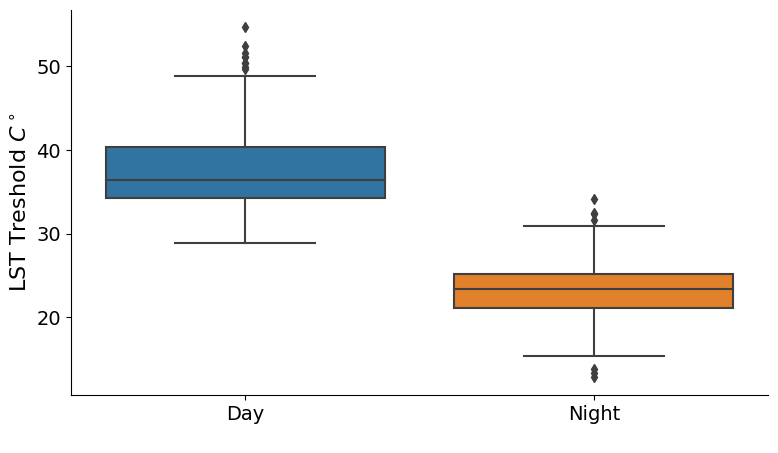

In [28]:
########################## Raw Data ###########################################
dfTreshold = pd.read_csv('../data_revision/dfTreshold3.csv')
df = dfTreshold[['Tr_day3', 'Tr_night3']]
df.columns = ['Day', 'Night']

############# Plot ############################################################
f,ax=plt.subplots(figsize=(9,5))
ax = setFont(ax, 'DejaVu Sans', fs1)
sns.boxplot(x="variable", y="value", data=pd.melt(df));
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_ylabel('LST Treshold '+r'$C^\circ$', size=fs)
ax.set_xlabel(' ');

# Figure S5

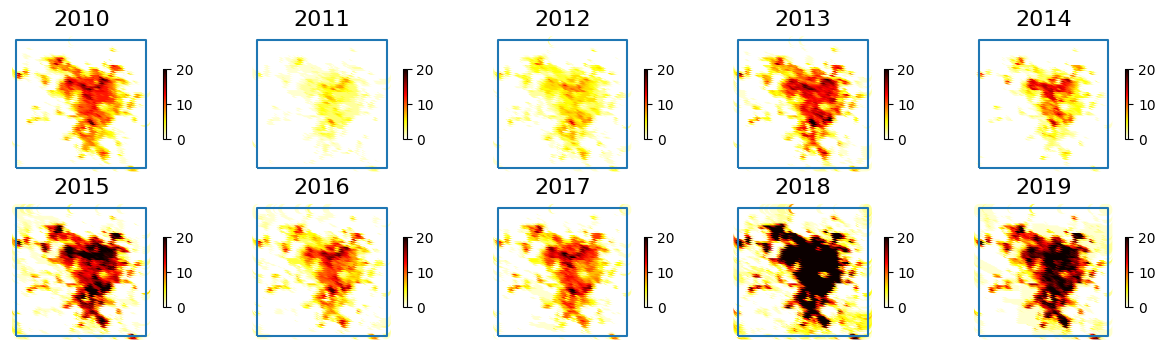

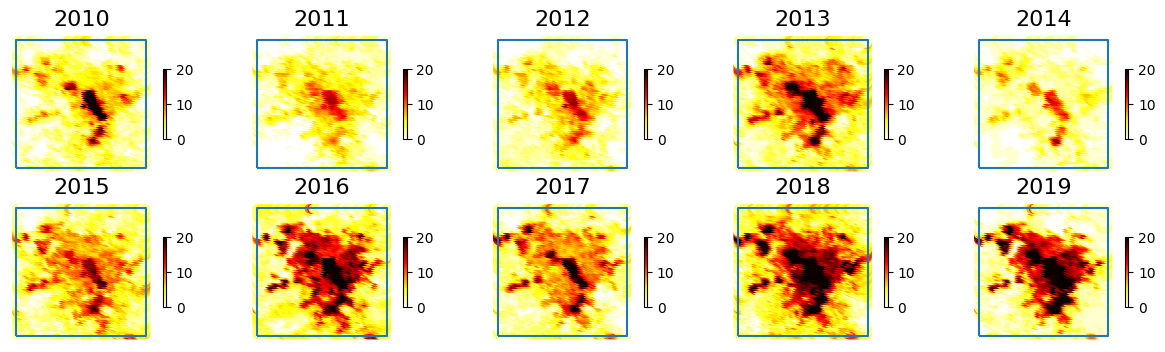

In [30]:
########### Data ###########################################
dfc = gpd.read_file('../data_revision/cities/all/gdfCities.shp')
dfc = dfc.to_crs('EPSG:4326')
geo = dfc[dfc['UC_NM_MN']=='Paris'].reset_index(drop=True)
S = returnCityBoundary(geo)
years = np.arange(2010, 2020)

########## Plot #############################################
f,axs = plt.subplots(2,5, figsize=(15, 4))
i=j=0
for year in years:
    ax = axs[i][j]
    gdf = gpd.read_file('../data_revision/exposure/gdf_paris_%d.shp'%year)
    gdf.plot(column='hot_days', legend=True, vmax=20, ax=ax,legend_kwds={'shrink': 0.5} , cmap='hot_r')
    ax.axis('off')
    ax.set_title('%d'%year, size=fs)
    cb_ax = f.axes[1] 
    cb_ax.tick_params(labelsize=fs1);
    S[0].boundary.plot(ax=ax)
    
    j+=1
    if j==5:
        j=0
        i+=1
        
f,axs = plt.subplots(2,5, figsize=(15, 4))
i=j=0
for year in years:
    ax = axs[i][j]
    gdf = gpd.read_file('../data_revision/exposure/gdf_paris_%d.shp'%year)
    gdf.plot(column='hot_nights', legend=True, vmax=20, ax=ax,legend_kwds={'shrink': 0.5} , cmap='hot_r')
    ax.axis('off')
    ax.set_title('%d'%year, size=fs)
    cb_ax = f.axes[1] 
    cb_ax.tick_params(labelsize=fs1);
    S[0].boundary.plot(ax=ax)
    
    j+=1
    if j==5:
        j=0
        i+=1

# Figure S6

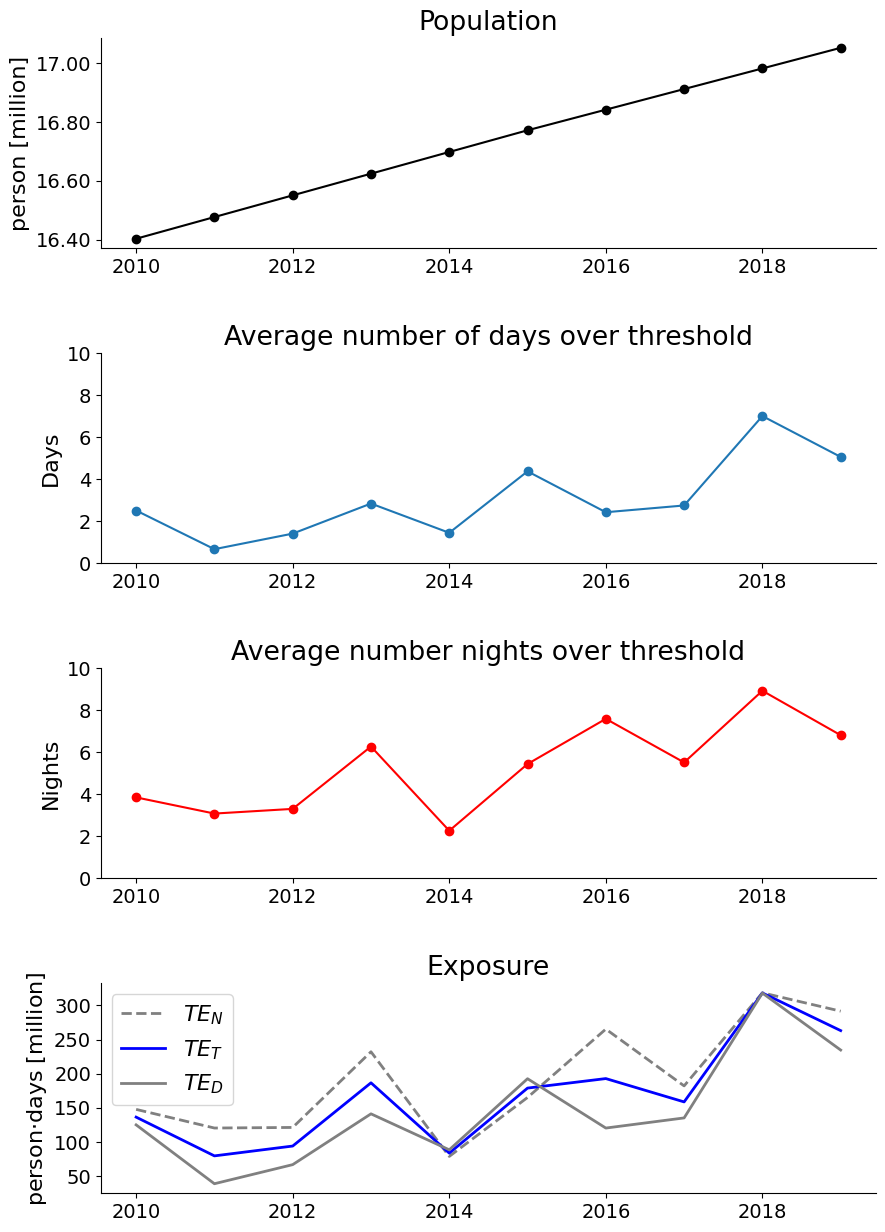

In [31]:
################### Raw Data ##########################################
cols=['year', 'ep', 'days', 'nights', 'pop', 'epdays', 'epnights']
dfYears = pd.DataFrame(columns=cols)
for year in years:
    gdf = gpd.read_file('../data_revision/exposure/gdf_paris_%d.shp'%year)
    epdays = np.sum(gdf['hot_days']*gdf['pop'])
    epnights = np.sum(gdf['hot_nights']*gdf['pop'])
                
    ep = (epdays+epnights)/2
    
    
    data = [year, ep, gdf['hot_days'].mean(), gdf['hot_nights'].mean(), gdf['pop'].sum(), epdays, epnights]
    
    dfYears = dfYears.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)

################### Plot ##################################################

def millions1(x, pos):
    'The two args are the value and tick position'
    return '%.2f' % (x * 1e-6)

f,axs=plt.subplots(4,1, figsize=(10,15))
ax=axs[0]
ax = setFont(ax, 'DejaVu Sans', fs1)
ax.plot(dfYears['year'], dfYears['pop'], color='black', marker='o')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
formatter = FuncFormatter(millions1)
ax.yaxis.set_major_formatter(formatter)


ax.set_ylabel('person [million]', size=fs)
ax.set_title('Population', size=fs*1.2);

ax=axs[1]
ax = setFont(ax, 'DejaVu Sans', fs1)
ax.plot(dfYears['year'], dfYears['days'], marker='o')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_title('Average number of days over threshold', size=fs*1.2);
ax.set_ylabel('Days', size=fs)
ax.set_ylim([0, 10])


ax=axs[2]
ax = setFont(ax, 'DejaVu Sans', fs1)
ax.plot(dfYears['year'], dfYears['nights'], color='red', marker='o')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_title('Average number nights over threshold', size=fs*1.2);
ax.set_ylabel('Nights', size=fs)
ax.set_ylim([0, 10])


ax=axs[3]
ax = setFont(ax, 'DejaVu Sans', fs1)
ax.plot(dfYears['year'], dfYears['epnights'], lw=2, color='gray', ls='--', label = r'$TE_N$')
ax.plot(dfYears['year'], dfYears['ep'], lw=2, color='blue',  label = r'$TE_T$')
ax.plot(dfYears['year'], dfYears['epdays'], lw=2, color='gray',  label = r'$TE_D$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_title('Exposure', size=fs*1.2);
ax.set_ylabel('person'+r'$\cdot$'+'days [million]', size=fs)
ax.legend(fontsize=fs)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

f.subplots_adjust(hspace=0.5)

# Figure S8

Text(-0.6, 4.25, 'B')

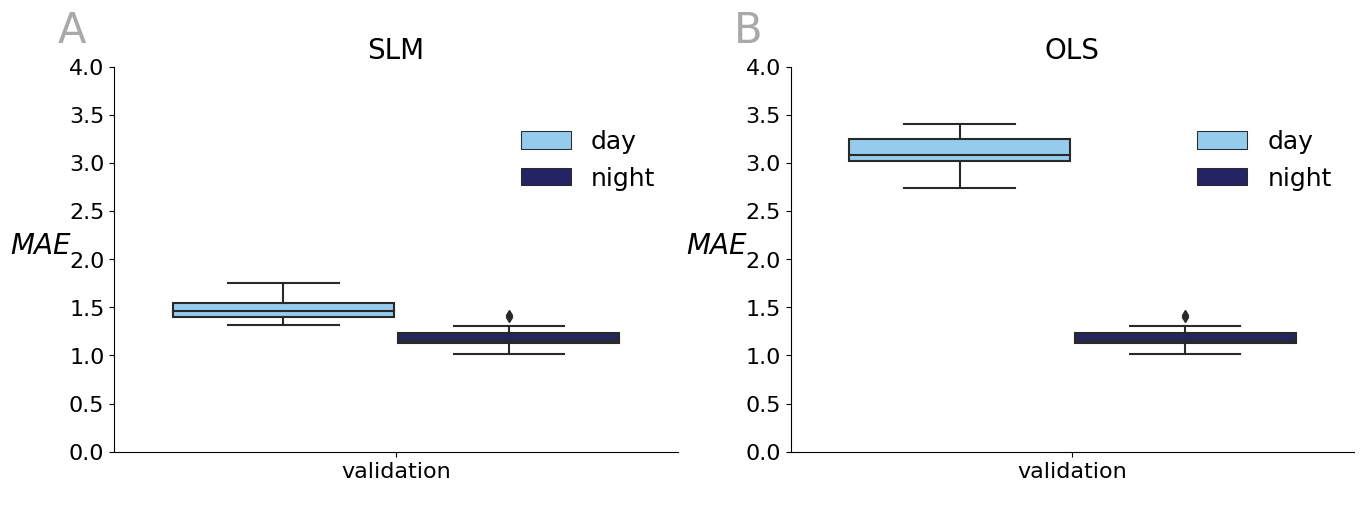

In [15]:
############### Raw data #################################################################
df_res_day   = pd.read_pickle('../data_revision/results/df_res_day_new.pkl')
df_res_night = pd.read_pickle('../data_revision/results/df_res_night_new.pkl')

################ Plot ##############################
cols = ['Phase', 'Period', 'Amount']
dfMAE_slm = pd.DataFrame(columns=cols)

for i in range(0, len(df_res_day)):
    data = ['validation', 'day', df_res_day['MAE_val_slm'][i]]
    dfMAE_slm = dfMAE_slm.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    
for i in range(0, len(df_res_night)):
    data = ['validation', 'night', df_res_night['MAE_val_slm'][i]]
    dfMAE_slm = dfMAE_slm.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    
cols = ['Phase', 'Period', 'Amount']
dfMAE_ols = pd.DataFrame(columns=cols)

for i in range(0, len(df_res_day)):
    data = ['validation', 'day', df_res_day['MAE_val_ols'][i]]
    dfMAE_ols = dfMAE_ols.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    
for i in range(0, len(df_res_night)):
    data = ['validation', 'night', df_res_night['MAE_val_slm'][i]]
    dfMAE_ols = dfMAE_ols.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    

f,axs=plt.subplots(1,2, figsize=(16,5))
ax=axs[0]
ax = setFont(ax,'DejaVu Sans',16)
sns.boxplot(x="Phase", y="Amount", hue="Period", data=dfMAE_slm, palette=palette, ax=ax)
ax.set_xlabel(' ')
ax.set_ylabel(r'$MAE$', size=20, rotation=0, labelpad=20)
ax.set_title('SLM', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend(fontsize=18, loc=1,frameon=False, title_fontsize=20, title=' ')
ax.set_ylim([0,4])
ax.text(-.6, 4.25, 'A', fontsize=30, color='darkgray')

ax=axs[1]
ax = setFont(ax,'DejaVu Sans',16)
sns.boxplot(x="Phase", y="Amount", hue="Period", data=dfMAE_ols, palette=palette, ax=ax)
ax.set_xlabel(' ')
ax.set_ylabel(r'$MAE$', size=20, rotation=0, labelpad=20)
ax.set_title('OLS', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend(fontsize=18, loc=1,frameon=False, title_fontsize=20, title=' ')
ax.set_ylim([0,4])

ax.text(-.6,  4.25, 'B', fontsize=30, color='darkgray')


# Figure S9

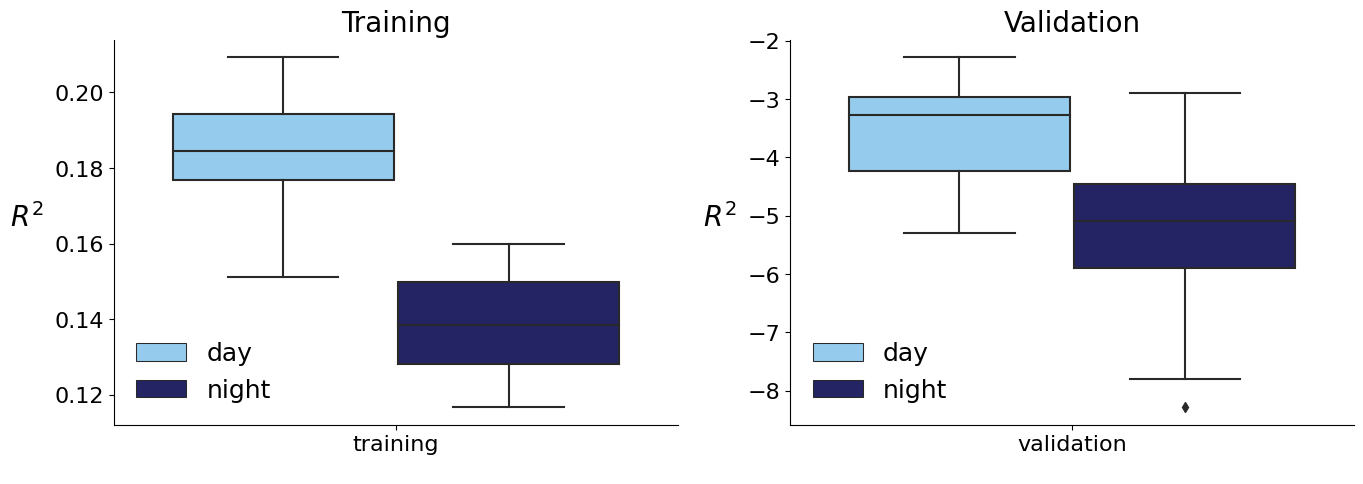

In [13]:
############### Raw data #################################################################
df_res_day   = pd.read_pickle('../data_revision/results/df_res_day_new.pkl')
df_res_night = pd.read_pickle('../data_revision/results/df_res_night_new.pkl')
cols = ['Phase', 'Period', 'Amount']
dfR2_ = pd.DataFrame(columns=cols)
palette = ['lightskyblue', 'midnightblue']

for i in range(0, len(df_res_day)):
    data = ['training', 'day', df_res_day['R2_train_ols'][i]]
    dfR2_ = dfR2_.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    data = ['validation', 'day', df_res_day['R2_val_ols'][i]]
    dfR2_ = dfR2_.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    
for i in range(0, len(df_res_night)):
    data = ['training', 'night', df_res_night['R2_train_ols'][i]]
    dfR2_ = dfR2_.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    data = ['validation', 'night', df_res_night['R2_val_ols'][i]]
    dfR2_ = dfR2_.append(pd.DataFrame(columns=cols, data=[data]), ignore_index=True)
    
def setFont(ax, font, size):
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname(font)
        label.set_fontsize(size)
    return ax  
    
############## Plot #########################################################################
f,axs=plt.subplots(1,2, figsize=(16,5))
ax=axs[0]
ax = setFont(ax,'DejaVu Sans',16)
dfR2_tr = dfR2_[dfR2_['Phase']=='training']
sns.boxplot(x="Phase", y="Amount", hue="Period", data=dfR2_tr, palette=palette, ax=ax)
ax.set_xlabel(' ')
ax.set_ylabel(r'$R^2$', size=20, rotation=0, labelpad=20)
ax.set_title('Training', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend(fontsize=18, loc='lower left',frameon=False, title_fontsize=20, title=' ')

ax=axs[1]
ax = setFont(ax,'DejaVu Sans',16)
dfR2_tr = dfR2_[dfR2_['Phase']=='validation']
sns.boxplot(x="Phase", y="Amount", hue="Period", data=dfR2_tr, palette=palette, ax=ax)
ax.set_xlabel(' ')
ax.set_ylabel(r'$R^2$', size=20, rotation=0, labelpad=20)
ax.set_title('Validation', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend(fontsize=18, loc='lower left',frameon=False, title_fontsize=20, title=' ')


# Figure S10

In [ ]:
###################### Raw Data #####################################################
S = gpd.read_file('../data_revision/paris_boundary_figure4.shp')   ###### urban boundary
gdf_city = gpd.read_file('../data_revision/gdf_city_figure4.shp')  ###### entiry city
dfc1 = gpd.read_file('../data_revision/dfc1_figure4.shp')          ###### city boundary
tmp = gpd.read_file('../data_revision/tmp_figure4.shp')            ###### most populated pixels
##################### Plot ############################################################

In [ ]:
fs=14
f,axs = plt.subplots(2,4, figsize=(20,10))
ax=axs[0][0]
vmax=20000
vmin=0
gdf_city.plot(column='pop', vmax=20000, vmin=0, ax=ax, markersize=25,
              legend=True, legend_kwds={'shrink': 0.3},cmap='copper_r', alpha=0.75)
dfc1.boundary.plot(ax=ax,color='black', lw=3)
S.boundary.plot(ax=ax, lw=8, color='darkblue')
ax.set_title('Entire urban area', size=fs)
ax.axis('off')

ax=axs[1][0]
vmax=20000
vmin=0
tmp.plot(column='pop', vmax=20000, vmin=0, ax=ax, markersize=25,
              legend=True, legend_kwds={'shrink': 0.3}, cmap='copper_r', alpha=0.75)
dfc1.boundary.plot(ax=ax,color='black', lw=3)
S.boundary.plot(ax=ax, lw=8, color='darkblue')
ax.set_title('Most populated area', size=fs)
ax.axis('off')
ax.set_title('Comulated NDVI \n 4364.15')

ax=axs[0][1]
vmax=0.85
gdf_city.plot(column='NDVI', vmin=0, vmax=vmax,ax=ax, markersize=25, legend=True, 
              legend_kwds={'shrink': 0.3}, cmap='Greens', alpha=0.75)
dfc1.boundary.plot(ax=ax,color='black', lw=3)
S.boundary.plot(ax=ax, lw=8, color='darkblue')
ax.set_title('Comulated NDVI \n 4364.15', size=fs)
ax.axis('off')

ax=axs[0][2]
gdf_city.plot(column='NDVI_', vmin=0, vmax=vmax,ax=ax, markersize=25, legend=True, 
              legend_kwds={'shrink': 0.3}, cmap='Greens', alpha=0.75)
dfc1.boundary.plot(ax=ax,color='black', lw=3)
S.boundary.plot(ax=ax, lw=8, color='darkblue')
ax.set_title('Increased comulated NDVI \n 6201.02', size=fs)

ax.axis('off')

ax=axs[0][3]
gdf_city.plot(column='NDVI_a', vmin=0, vmax=vmax,ax=ax, markersize=25, legend=True, 
              legend_kwds={'shrink': 0.3}, cmap='Greens', alpha=0.75)
dfc1.boundary.plot(ax=ax,color='black', lw=3)
S.boundary.plot(ax=ax, lw=8, color='darkblue')
ax.set_title('Increased comulated NDVI \n 4969.85', size=fs)
ax.axis('off')


ax=axs[1][1]
gdf_city.plot(column='ed', ax=ax, markersize=30, legend=True, 
              legend_kwds={'shrink': 0.3}, cmap='hot_r', vmin=0, vmax=10)
dfc1.boundary.plot(ax=ax,color='black', lw=3)
S.boundary.plot(ax=ax, lw=8, color='darkblue')
vc = gdf_city['ep'].sum()/1e6 
ax.set_title(r'$TE_T^0=%dM$'%vc+' [person days]', size=fs)
ax.axis('off')

ax=axs[1][2]
gdf_city.plot(column='ed1', ax=ax, markersize=30, legend=True, 
              legend_kwds={'shrink': 0.3}, cmap='hot_r', vmin=0, vmax=10)
dfc1.boundary.plot(ax=ax,color='black', lw=3)
S.boundary.plot(ax=ax, lw=8, color='darkblue')
vc = gdf_city['ep1'].sum()/1e6 
ax.set_title(r'$TE_T^0=%dM$'%vc+' [person days]', size=fs)
ax.axis('off')

ax=axs[1][3]

gdf_city.plot(column='ed2', ax=ax, markersize=30, legend=True, legend_kwds={'shrink': 0.3},
              cmap='hot_r', vmin=0, vmax=10)
dfc1.boundary.plot(ax=ax,color='black', lw=3)
S.boundary.plot(ax=ax, lw=8, color='darkblue')
vc = gdf_city['ep2'].sum()/1e6 
ax.set_title(r'$TE_T^0=%dM$'%vc+' [person days]', size=fs)
ax.axis('off')


